You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Model visualization file was not created.
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8028 - loss: 0.6258 - val_accuracy: 0.9563 - val_loss: 0.1355
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9587 - loss: 0.1390 - val_accuracy: 0.9686 - val_loss: 0.1003
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9710 - loss: 0.0964 - val_accuracy: 0.9726 - val_loss: 0.0892
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9776 - loss: 0.0730 - val_accuracy: 0.9769 - val_loss: 0.0775
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9808 - loss: 0.0608 - val_accuracy: 0.9738 - val_loss: 0.0898
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9861 - 

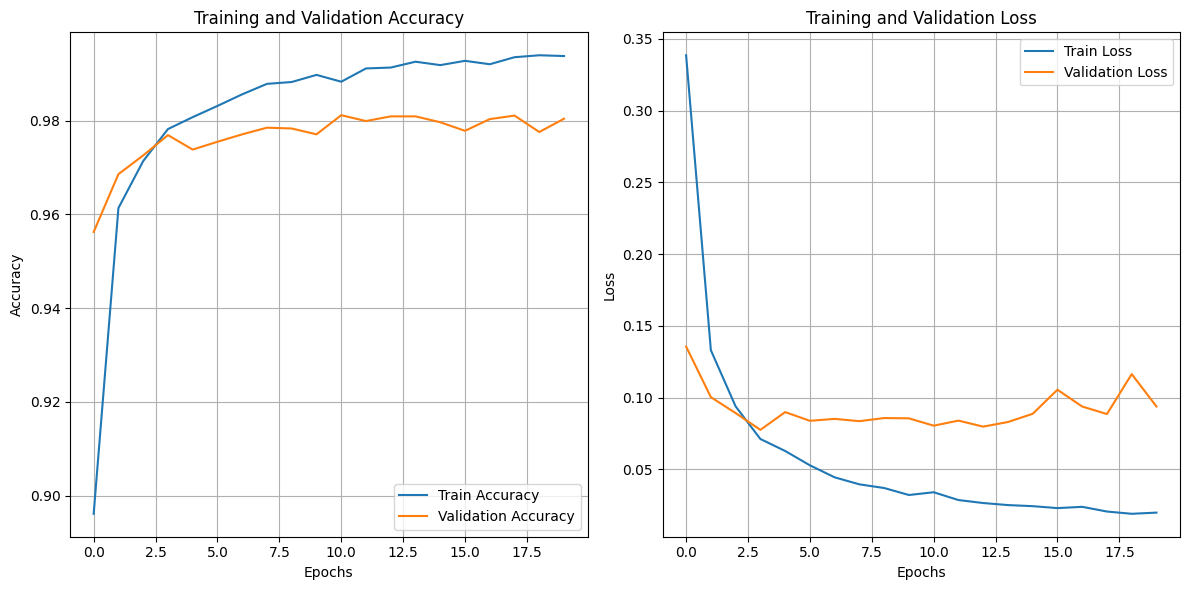

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
import os

# Function to load and preprocess the MNIST dataset
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

# Function to create the MLP model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Function to visualize the model architecture
def visualize_model(model):
    try:
        # Generate the model visualization
        plot_model(
            model,
            to_file="model.png",
            show_shapes=True,
            show_layer_names=True,
            rankdir="TB",
            expand_nested=False,
            dpi=96,
        )
        # Display the image if generated successfully
        if os.path.exists("model.png"):
            display(Image("model.png"))
        else:
            print("Model visualization file was not created.")
    except ImportError as e:
        print("Graphviz or pydot is not installed. Please install them using:")
        print("pip install graphviz pydot")
    except Exception as e:
        print(f"An unexpected error occurred while generating the model visualization: {e}")

# Function to train the model
def train(model, x_train, y_train):
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=20,
        validation_split=0.2,
        verbose=1
    )
    return history

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Function to plot training history (Accuracy and Loss curves)
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load and preprocess the data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    
    # Create the model
    model = create_model()
    
    # Visualize the model architecture
    visualize_model(model)
    
    # Train the model
    history = train(model, x_train, y_train)
    
    # Evaluate the model
    evaluate_model(model, x_test, y_test)
    
    # Plot training history (Accuracy and Loss)
    plot_training_history(history)


Epoch 1/20


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8078 - loss: 0.6068 - val_accuracy: 0.9613 - val_loss: 0.1263
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9575 - loss: 0.1412 - val_accuracy: 0.9701 - val_loss: 0.0985
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9717 - loss: 0.0960 - val_accuracy: 0.9716 - val_loss: 0.0918
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9775 - loss: 0.0730 - val_accuracy: 0.9720 - val_loss: 0.0929
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9825 - loss: 0.0572 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9772 - val_loss: 0.0813
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9853 - loss: 0.0450 - val_accuracy: 0.9750 - val_loss: 0.0941
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9800 

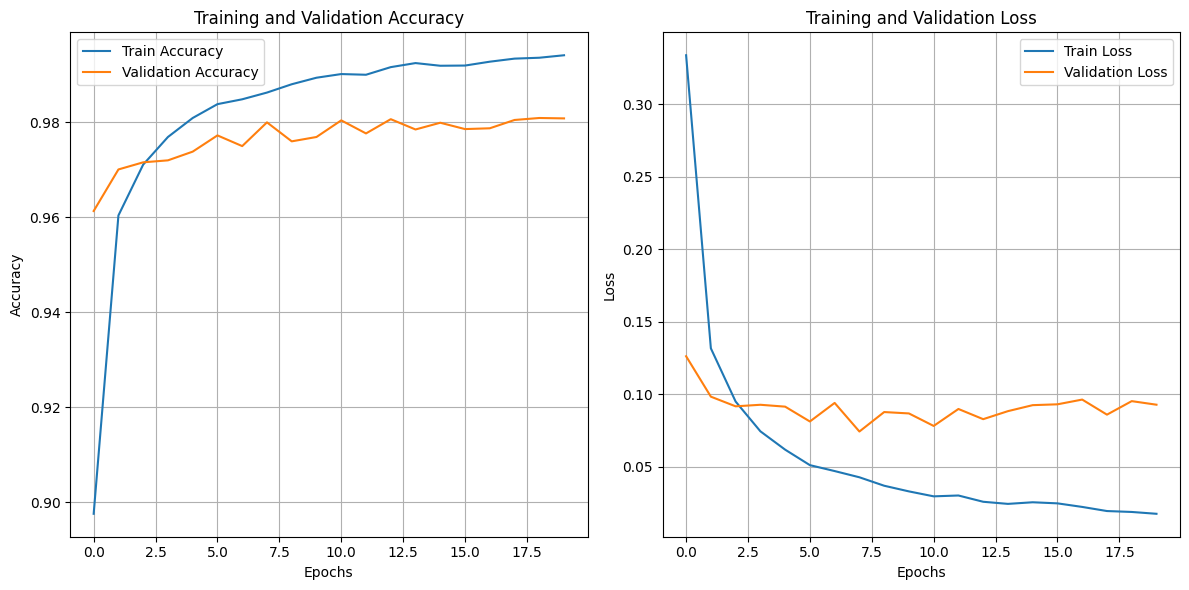

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


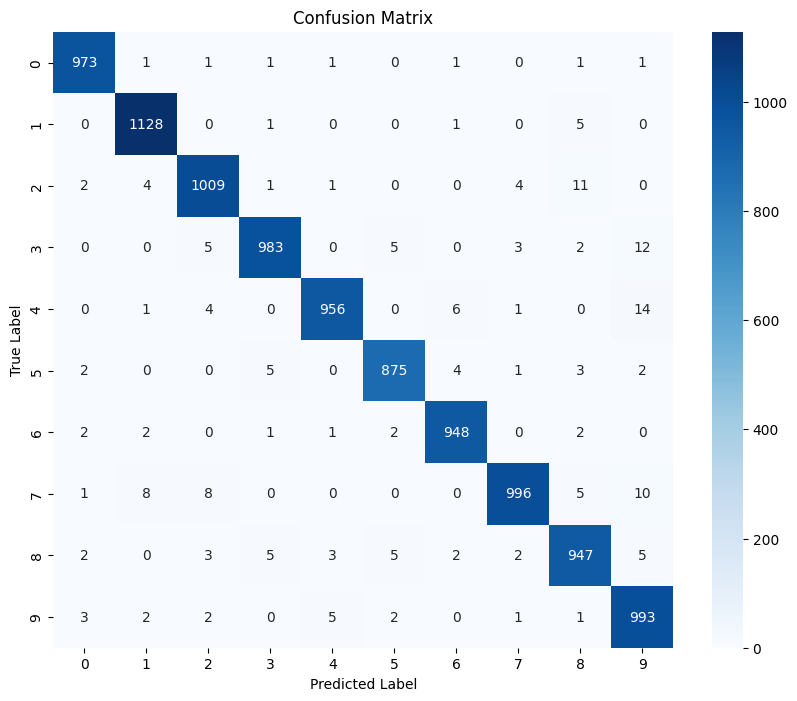

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



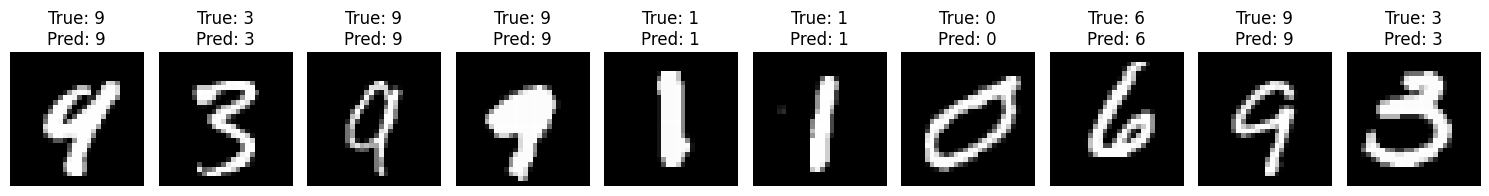

In [10]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

# Function to create the MLP model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train the model
def train(model, x_train, y_train):
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=20,
        validation_split=0.2,
        verbose=1
    )
    return history

# Function to evaluate the model
def evaluate_model_with_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)  
    y_true = y_test.argmax(axis=1)         

    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_predictions(x_test, y_test, y_pred, num_samples=10):
    indices = random.sample(range(x_test.shape[0]), num_samples)  
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    y_true_classes = y_test.argmax(axis=1)  
    y_pred_classes = y_pred.argmax(axis=1)  

    for i, ax in enumerate(axes):
        idx = indices[i]
        ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Reshape back to 28x28
        ax.set_title(f"True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    model = create_model()
    history = train(model, x_train, y_train)
    plot_training_history(history)

    y_pred = model.predict(x_test)



    visualize_predictions(x_test, y_test, y_pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


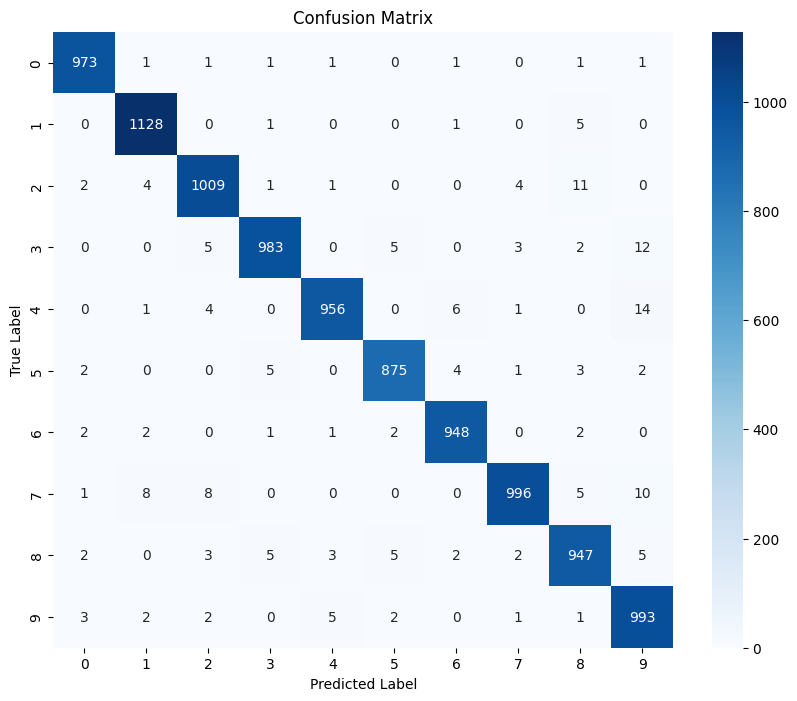

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:
evaluate_model_with_metrics(model, x_test, y_test)


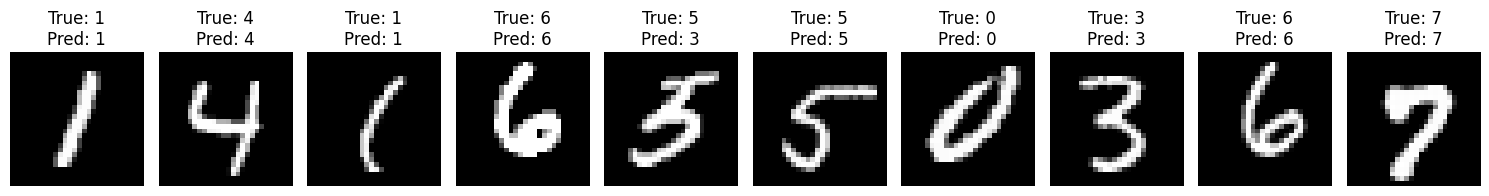

In [12]:
   visualize_predictions(x_test, y_test, y_pred)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8050 - loss: 0.6187 - val_accuracy: 0.9624 - val_loss: 0.1224
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9603 - loss: 0.1365 - val_accuracy: 0.9697 - val_loss: 0.0975
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9719 - loss: 0.0935 - val_accuracy: 0.9728 - val_loss: 0.0912
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9766 - loss: 0.0741 - val_accuracy: 0.9753 - val_loss: 0.0828
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9806 - loss: 0.0600 - val_accuracy: 0.9723 - val_loss: 0.0982
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0565 - val_accuracy: 0.9756 - val_loss: 0.0847
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9783 - val_loss: 0.0849
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accurac

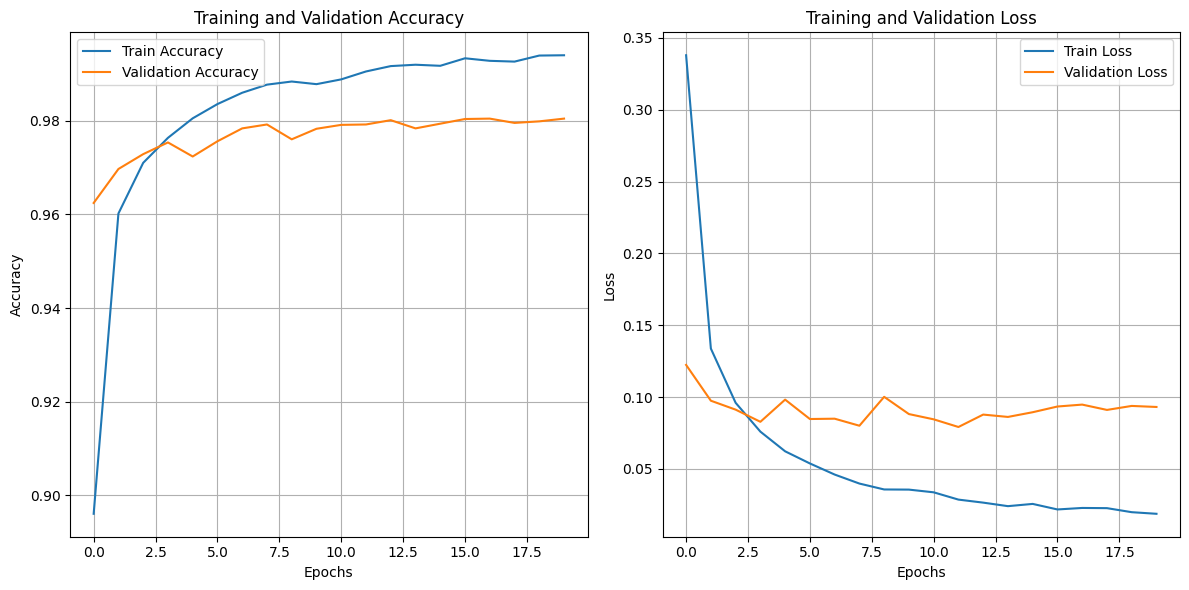

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


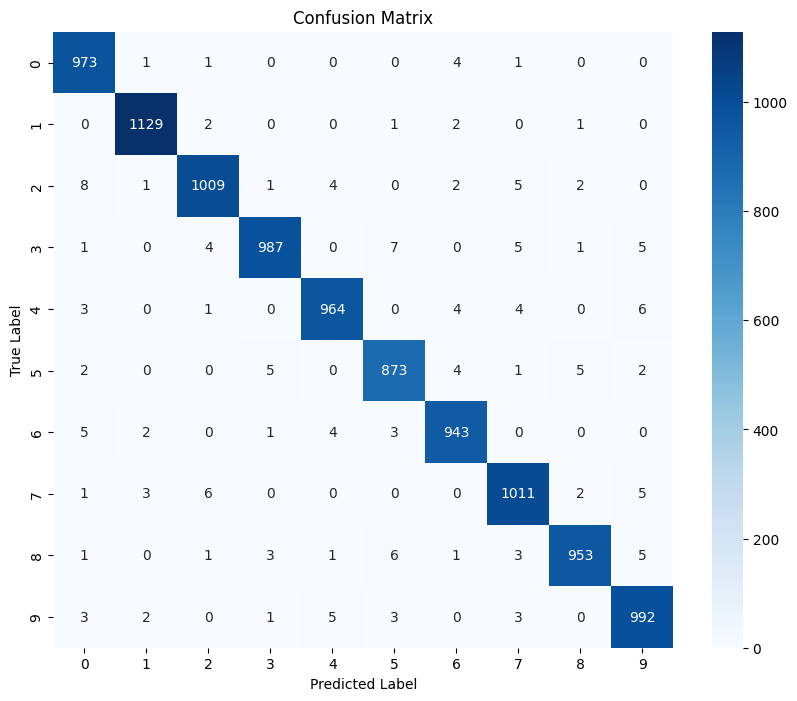

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



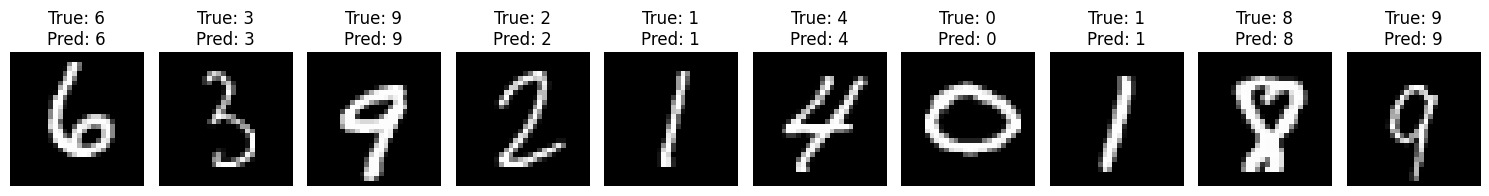

In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Visualize predictions
indices = random.sample(range(x_test.shape[0]), 10)
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

y_true_classes = y_test.argmax(axis=1)
y_pred_classes = y_pred.argmax(axis=1)

for i, ax in enumerate(axes):
    idx = indices[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Reshape back to 28x28
    ax.set_title(f"True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
